In [38]:
%matplotlib inline
import numpy as np
from os.path import join
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression


In [2]:
#####################
# Variables
#####################
filterATG = False
filter_different_signs = False
summarize_gene=False
genotypes = ("B73", "Mo17", "P39", "CML103")


In [7]:
#####################
# Paths
#####################
# Path to proteomic comparisons
protein_path = "../../data/fourGenos_peptidePairs_abundance_RNA_allTissues.txt"
# Path to reference genomes and annotations for getting UTR sequence
codon_dir = "/media/jlg374/Data1/protein_diverse_maize/references/"

In [6]:
# Load codon counts for each genotype:
codons = list()
for genotype in genotypes:
    codon_path = join(codon_dir, genotype, "codon_counts.txt")
    codons.append(pd.read_csv(codon_path, sep="\t", header=0))
codons = pd.concat(codons, ignore_index=True).set_index('Gene')
codons

CDS_Length  TTT  TTC  TTA  TTG  CTT  CTC  CTA  CTG  ATT  ...  \
Gene                                                                     ...   
Zm00001e000001        1947   20    8    9   16   16   31    5   15   19  ...   
Zm00001e000002        1074   10    6    3    9    5    4    2   13    3  ...   
Zm00001e000003         390    4    2    1    0    3    1    1    2    0  ...   
Zm00001e000004         429    3    4    1    1    2    0    1    0    3  ...   
Zm00001e000005         417    0    1    0    0    0    7    1    1    0  ...   
...                    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
Zm00021a061445         909   10    9    4    4    3    1    5    1    8  ...   
Zm00021a061446         462    4    4    2    4    4    7    1    2    4  ...   
Zm00021a061447         432    2    5    5    3    4    0    0    1    3  ...   
Zm00021a061448         396    2    2    4    3    2    3    3    3    7  ...   
Zm00021a061449         402    0    4    5    3    1    0    0    1    2  ...   

                CGA  CGG  AGT  AGC  AGA  AGG  GGT  GGC  GGA  GGG  
Gene                                                              
Zm00001e000001    0    9   13    7    7   12    8   14   12    4  
Zm00001e000002    2    0    6    2    5    7    4    1   10    3  
Zm00001e000003    0    0    1    1    1    0    5    1    2    3  
Zm00001e000004    2    0    2    3    3    4    3    1    4    0  
Zm00001e000005    1    5    1    5    0    3    5    9    2    8  
...             ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
Zm00021a061445    3    3    2    5    5    3    6    1    4    3  
Zm00021a061446    1    4    3    4    3    2    2    1    6    2  
Zm00021a061447    6    1    1    0    2    1    2    2    4    0  
Zm00021a061448    0    0    3    0    1    2    1    0    1    4  
Zm00021a061449    0    0    8    2    3    2    7    1    0    3  

[167491 rows x 65 columns]

In [11]:
# Read in peptide abundance comparisons
pep = pd.read_csv(protein_path, sep="\t", header=0)
pep['LR_protein'] = pep.geno1_abundance - pep.geno2_abundance
pep['LR_RNA'] = pep.geno1_RNA - pep.geno2_RNA
pep

ID             Protein1             Protein2  \
0          [-].MDASAEVDHLAAER.[S]  Zm00001e036430_P003  Zm00040a054821_P001   
1       [-].MDHAADAHRTDLMTITR.[H]  Zm00001e019168_P001  Zm00040a029313_P001   
2            [-].MDIETHAAALAR.[D]  Zm00001e020967_P001  Zm00040a031922_P001   
3              [-].MECVLGLVGR.[D]  Zm00001e012245_P002  Zm00040a018718_P002   
4         [-].MESTFIMIKPDGVQR.[G]  Zm00001e002371_P001  Zm00040a003724_P001   
...                           ...                  ...                  ...   
48563  [R].YYGGNEFIDMAESLCQKR.[A]  Zm00014a004031_P001  Zm00021a008688_P001   
48564     [RK].KHIDATLGSGNLR.[ED]  Zm00014a009242_P001  Zm00021a058672_P003   
48565           [RK].LCFFASVR.[H]  Zm00014a029900_P001  Zm00021a024602_P001   
48566    [RK].NLGEFVSANVPTVGK.[F]  Zm00014a035552_P001  Zm00021a016160_P001   
48567         [RK].WFQGTADAVR.[Q]  Zm00014a039318_P001  Zm00021a008631_P001   

       n  geno1_abundance  geno2_abundance geno1   geno2           Gene1  \
0      1         7.312679         7.233423   B73     P39  Zm00001e036430   
1      1         7.571647         8.244350   B73     P39  Zm00001e019168   
2      1         6.695630         6.736570   B73     P39  Zm00001e020967   
3      1         7.503579         7.618988   B73     P39  Zm00001e012245   
4      1         7.673335         7.689789   B73     P39  Zm00001e002371   
...   ..              ...              ...   ...     ...             ...   
48563  1         6.965556         6.726418  Mo17  CML103  Zm00014a004031   
48564  1         6.593834         6.404376  Mo17  CML103  Zm00014a009242   
48565  1         8.028298         8.102724  Mo17  CML103  Zm00014a029900   
48566  1         6.691033         6.786994  Mo17  CML103  Zm00014a035552   
48567  1         8.027312         8.159634  Mo17  CML103  Zm00014a039318   

                Gene2  Tissue  geno1_RNA  geno2_RNA        H2  nGenos  \
0      Zm00040a054821  Leaf 3   2.322437   2.210566  0.780701       4   
1      Zm00040a029313  Leaf 3   3.209516   3.685793  0.727774       4   
2      Zm00040a031922  Leaf 3   1.689905   1.463729  0.599569       3   
3      Zm00040a018718  Leaf 3   1.760327   1.961096  0.209509       3   
4      Zm00040a003724  Leaf 3   1.791337   1.581246  0.779235       4   
...               ...     ...        ...        ...       ...     ...   
48563  Zm00021a008688  Leaf 4   0.000000   2.301361  0.897604       3   
48564  Zm00021a058672  Leaf 4   1.461112   1.379150  0.805799       4   
48565  Zm00021a024602  Leaf 4   1.200882   1.629674  0.000000       2   
48566  Zm00021a016160  Leaf 4   2.007750   1.820615  0.457738       2   
48567  Zm00021a008631  Leaf 4   2.780962   2.659052  0.970022       3   

       Intercept  LR_protein    LR_RNA  
0       7.266947    0.079256  0.111871  
1       7.912987   -0.672703 -0.476277  
2       6.670552   -0.040940  0.226175  
3       7.576700   -0.115408 -0.200769  
4       7.700101   -0.016454  0.210091  
...          ...         ...       ...  
48563   6.913835    0.239137 -2.301361  
48564   6.620935    0.189458  0.081962  
48565   8.035584   -0.074426 -0.428792  
48566   6.679042   -0.095960  0.187135  
48567   8.100353   -0.132322  0.121910  

[48568 rows x 18 columns]

In [51]:
# Prepare training data
X1 = np.array(codons.loc[pep.Gene1]) #.drop('CDS_Length', axis=1))
# X1n = X1.sum(axis=1, keepdims=True)
# X1 = X1 / X1n
X2 = np.array(codons.loc[pep.Gene2]) #.drop('CDS_Length', axis=1))
# X2n = X2.sum(axis=1, keepdims=True)
# X2 = X2 / X2n

XP = X1 - X2
yP = pep.LR_protein

yR = pep.LR_RNA
keep = ~np.isnan(yR)
XR = XP[keep, :]
yR = yR[keep]

XP[0:10, 0:5]

array([[-171,    0,   -2,    1,    0],
       [   6,    1,   -1,    0,    0],
       [   3,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0],
       [   0,   -1,    1,    0,    0],
       [   0,    0,    0,    0,    0],
       [-246,   -4,   -3,   -2,   -1],
       [-126,   -1,   -1,    0,    0],
       [   0,    0,    0,    0,    0],
       [ 435,    3,    2,    0,    2]])

## Fit models
### Protein

In [69]:
MP = LinearRegression()
MP.fit(XP, yP)
r2P = MP.score(XP, yP)
print(r2P)
coefsP = pd.DataFrame({'Feature': list(codons.columns),
                      'Beta': MP.coef_})
pd.set_option("max_rows", None)
display(coefsP.iloc[coefsP['Beta'].abs().argsort()])

0.012947916283741145


Feature      Beta
23         CAA  0.000111
24         CAG -0.000121
64         GGG -0.000140
16         GTG  0.000249
0   CDS_Length -0.000324
6          CTC -0.000333
7          CTA -0.000408
53         CGT -0.000579
48         GCG -0.000648
30         GAC -0.000722
61         GGT  0.000876
27         AAA -0.000897
2          TTC  0.000942
32         GAG  0.001002
21         CAT -0.001235
50         TGC  0.001588
28         AAG  0.001726
9          ATT -0.001781
55         CGA  0.001783
62         GGC -0.001920
54         CGC  0.001995
52         TGG  0.002014
31         GAA  0.002024
4          TTG -0.002061
40         CCG  0.002076
29         GAT  0.002137
39         CCA  0.002145
10         ATC  0.002151
34         TCC  0.002168
45         GCT  0.002281
12         ATG -0.002339
63         GGA  0.002361
37         CCT  0.002375
5          CTT  0.002489
17         TAT  0.002510
47         GCA  0.002536
59         AGA -0.002619
41         ACT -0.002638
58         AGC  0.002640
46         GCC  0.002676
26         AAC -0.002718
33         TCT -0.002784
38         CCC -0.002814
42         ACC -0.003001
49         TGT -0.003193
35         TCA  0.003239
25         AAT  0.003601
13         GTT  0.003607
14         GTC  0.003640
3          TTA  0.003694
36         TCG  0.003744
57         AGT  0.003865
8          CTG  0.003941
1          TTT  0.004215
56         CGG -0.004315
60         AGG  0.004439
22         CAC  0.004534
43         ACA -0.005208
44         ACG  0.005958
15         GTA -0.006237
18         TAC  0.006300
11         ATA  0.007139
51         TGA -0.010047
19         TAA -0.022389
20         TAG -0.025731

### RNA

In [72]:
MR = LinearRegression()
MR.fit(XR, yR)
r2R = MR.score(XR, yR)
print(r2R)

coefsR = pd.DataFrame({'Feature': list(codons.columns),
                      'Beta': MR.coef_})
pd.set_option("max_rows", None)
display(coefsR.iloc[coefsR['Beta'].abs().argsort()])

0.12371302453871558


Feature      Beta
37         CCT -0.000046
57         AGT  0.000140
8          CTG  0.000368
41         ACT -0.000561
2          TTC  0.000632
28         AAG  0.000699
27         AAA  0.000728
14         GTC -0.000844
0   CDS_Length  0.000899
3          TTA -0.000990
64         GGG  0.001012
33         TCT  0.001032
7          CTA  0.001219
46         GCC -0.001661
62         GGC -0.001764
48         GCG -0.001907
9          ATT  0.002058
25         AAT  0.002094
11         ATA -0.002596
35         TCA -0.002690
59         AGA  0.002728
12         ATG -0.002758
32         GAG -0.003382
43         ACA -0.003922
30         GAC -0.004189
24         CAG -0.004406
47         GCA  0.004855
34         TCC -0.006078
15         GTA  0.006236
54         CGC  0.006264
44         ACG -0.006502
49         TGT  0.006593
6          CTC -0.007217
13         GTT -0.007288
39         CCA -0.007639
38         CCC  0.007909
17         TAT  0.008238
40         CCG  0.008528
1          TTT -0.008608
58         AGC -0.008771
22         CAC  0.008906
18         TAC -0.009201
42         ACC -0.009384
31         GAA  0.009728
10         ATC  0.010149
29         GAT -0.011004
23         CAA  0.012124
60         AGG -0.012753
16         GTG -0.013382
52         TGG -0.013595
21         CAT -0.013756
53         CGT  0.013862
36         TCG  0.013989
5          CTT -0.014358
45         GCT  0.014538
50         TGC -0.015189
63         GGA -0.015815
61         GGT -0.016096
26         AAC -0.017734
19         TAA  0.019442
4          TTG -0.019988
55         CGA -0.020038
56         CGG -0.033983
51         TGA  0.074965
20         TAG  0.081364

In [79]:
coefsP.Beta.corr(coefsR.Beta, method="pearson")

-0.5724139539826396

## Plot predictions vs reality

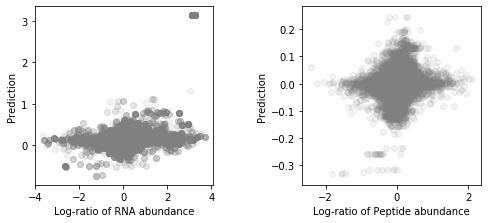

In [44]:
color="gray"

fig = plt.figure(figsize=(8, 6))

gs = gridspec.GridSpec(1,2, wspace=.5)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

ax1.scatter(yR, MR.predict(XR), alpha=0.1, color=color)
ax2.scatter(yP, MP.predict(XP), alpha=0.1, color=color)

ax1.set(xlabel='Log-ratio of RNA abundance', ylabel='Prediction', aspect=1.0/ax1.get_data_ratio())
ax2.set(xlabel='Log-ratio of Peptide abundance', ylabel='Prediction', aspect=1.0/ax2.get_data_ratio())

fig.show()